EDA of Student Performance on Exams 

Author: Amanda Stanley  
Source: [Kaggle – Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)  

The goal of this project is to explore how demographics and socioeconomic factors affect student achievement in:
- Mathematics  
- Reading  
- Writing  

Questions being explored: 
1. How do scores vary by gender, race/ethnicity, and parental education?
2. How can test preparation courses and lunch type affect performance on exams?
3. Are scores in math, reading, and writing correlated?
4. Which factors seem most influential in student success?

In [11]:
!pip install kagglehub --upgrade

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/a4/8e/4077b08b95a1f8302c694a8b399bd413815fbe89045c41e6e08cd7d9439a/kagglehub-0.3.13-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 1.8 MB/s eta 0:00:00


First, we will load the dataset and review its structure:
- Number of rows and columns  
- Data types for each variable  
- Presence of missing values  
- A first look at the data sample  

This helps us understand what we’re working with before performing any analysis.

In [5]:
import pandas as pd 
import numpy as np
import plotly.express as px 
import plotly.graph_objects as go
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

100%|██████████| 8.70k/8.70k [00:00<00:00, 1.11MB/s]

Extracting files...
Path to dataset files: /home/fe70d8fd-2c60-4efc-b702-faa6efeb8d53/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1


In [6]:
df = pd.read_csv(path + "/StudentsPerformance.csv")

df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The dataset is already fairly clean, but we’ll:
- Standardize column names for readability (replace spaces with underscores)  
- Confirm that numeric columns are properly typed  
- Verify that there are no missing values  

In [7]:
# Check for missing data
df.isna().sum()

# Rename columns for convenience
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Below we visualize distributions of **Math**, **Reading**, and **Writing** scores.

Observations:
- Most students score between **60–80** in all three subjects.  
- The distributions are slightly **right-skewed**, meaning there are a few low performers but many mid–high performers.  
- No extreme outliers are present, so we'll assume grading is consistent. 

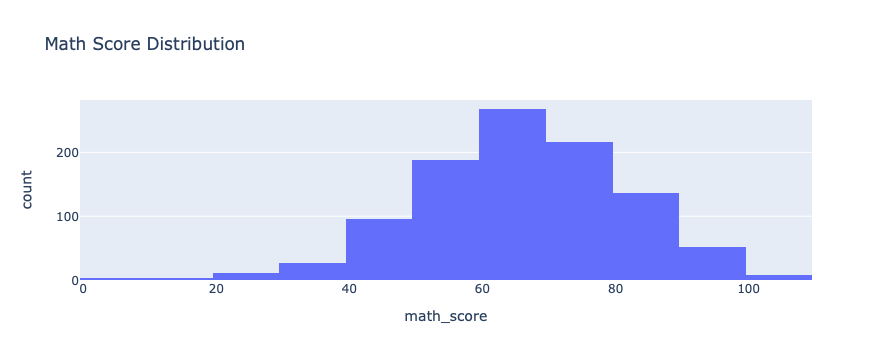

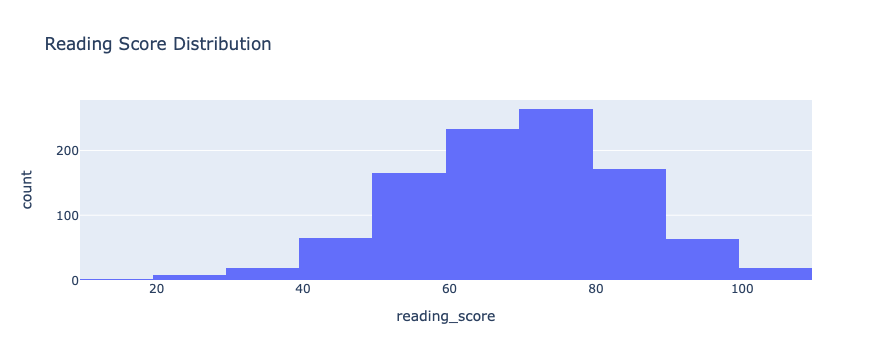

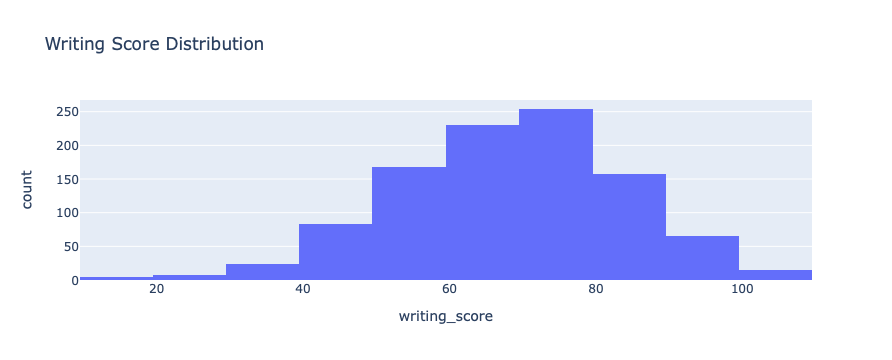

In [34]:
fig = px.histogram(df, 
                   x = 'math_score', 
                   nbins = 15, 
                   title = 'Math Score Distribution'
                  )
fig.show()

fig = px.histogram(df, 
                   x = 'reading_score', 
                   nbins = 15, 
                   title = 'Reading Score Distribution'
                  )
fig.show()

fig = px.histogram(df, 
                   x = 'writing_score', 
                   nbins = 15, 
                   title = 'Writing Score Distribution'
                  )
fig.show()

Below we compare male and female performance across math, reading, and writing.

Observations:
- Females tend to outperform males in reading and writing.  
- Math performance is roughly equal across genders. Low female performers seem to skew female results. 
- This reflects common educational trends observed in broader research, where females excel in language-based subjects while math remains balanced.

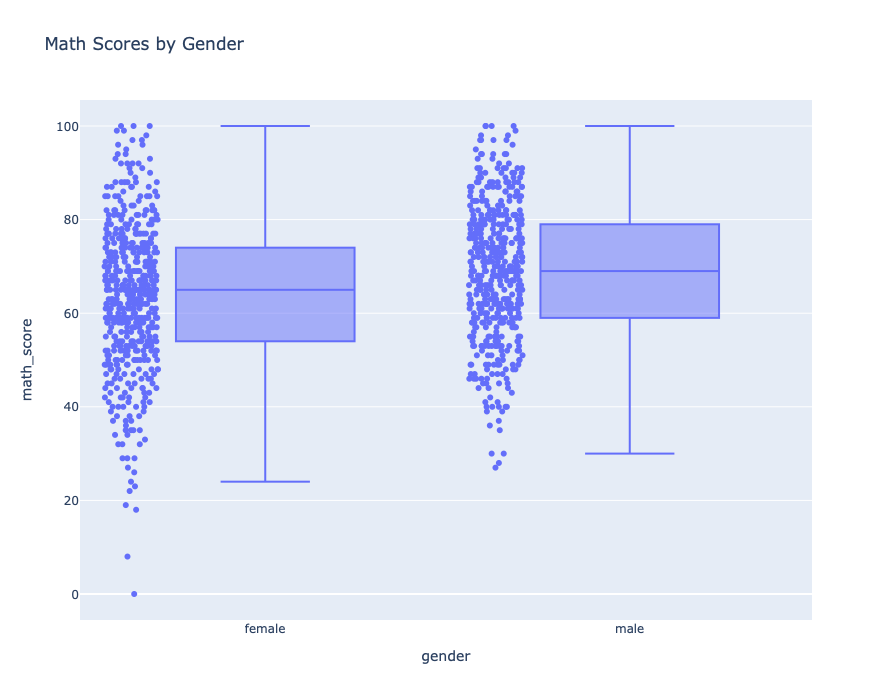

In [35]:
#math scores by gender
px.box(df, 
       x = 'gender', 
       y = 'math_score', 
       points = 'all', 
       title = 'Math Scores by Gender', 
       height = 700, 
       width = 600
      )

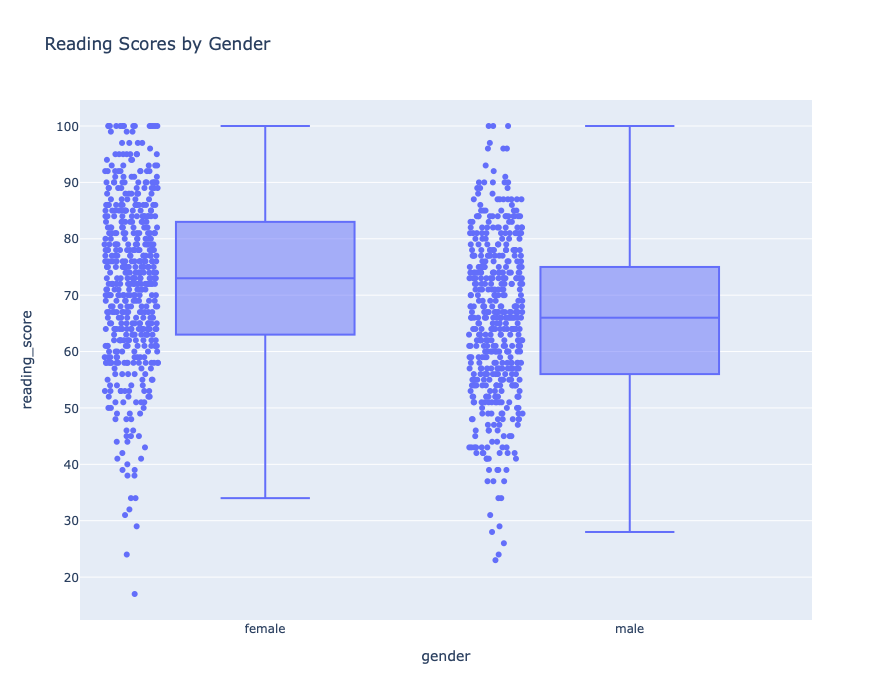

In [33]:
#reading scores by gender
px.box(df, 
       x = 'gender', 
       y = 'reading_score', 
       points = 'all', 
       title = 'Reading Scores by Gender', 
       height = 700, 
       width = 600
      )

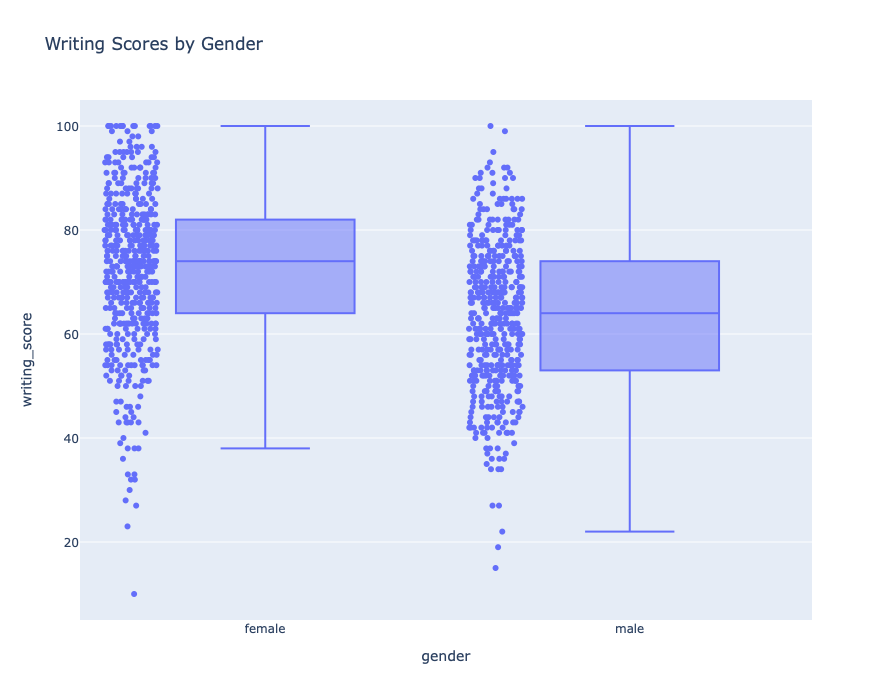

In [42]:
#writing scores by gender 
px.box(df, 
        x = 'gender', 
        y = 'writing_score', 
        points = 'all', 
        title = 'Writing Scores by Gender', 
        height = 700, 
        width = 600
)

Below we compare scores based on:
- Whether students completed a test preparation course.
- Whether they receive a standard or free/reduced lunch.

Observations:
- Students who completed test preparation scored 5–10 points higher on average across all subjects.  
- Those with standard lunches performed slightly better, possibly reflecting socioeconomic differences (standard lunch often correlates with higher income households).

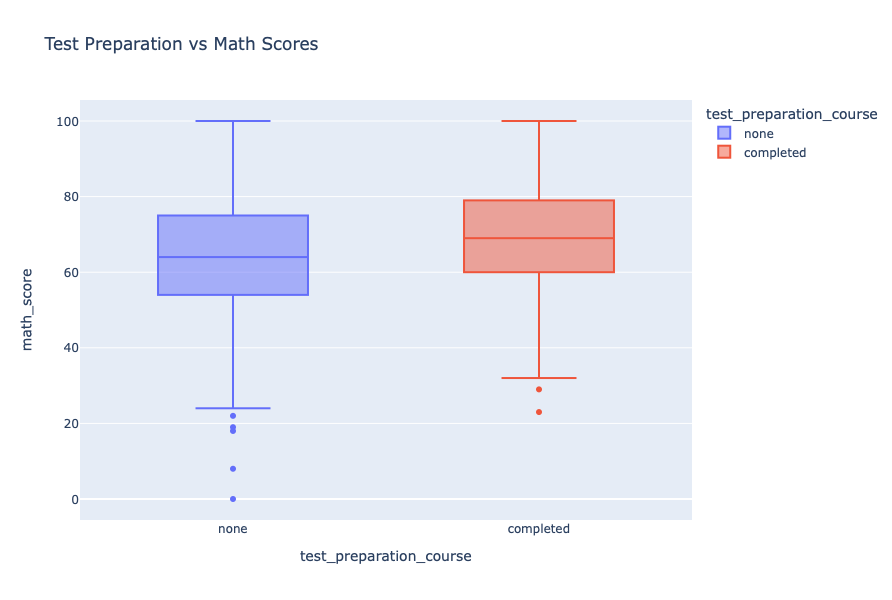

In [43]:
#Comparison between students who received test prep and those who had not
px.box(df, 
        x = 'test_preparation_course', 
        y = 'math_score', 
        color = 'test_preparation_course',
        title ='Test Preparation vs Math Scores',
        height = 600, 
)

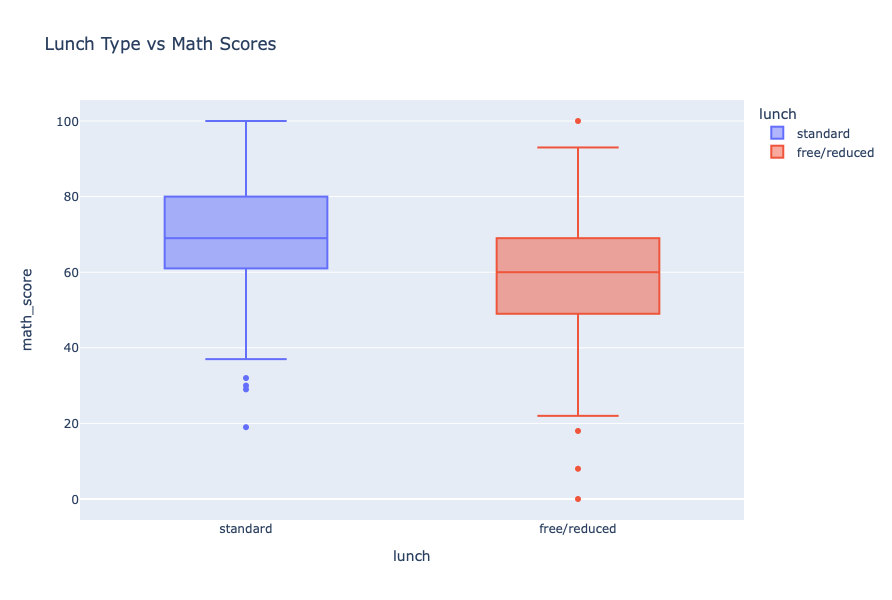

In [44]:
#Comparison between students who students who get free/reduced lunch and those who don't
px.box(df, 
        x = 'lunch', 
        y ='math_score', 
        color = 'lunch',
        title = 'Lunch Type vs Math Scores', 
        height = 600
)

Below we look at the relationships between math, reading, and writing scores.

Observation:
- The correlation heatmap shows moderate to strong positive relationships among all three subjects (r ≈ 0.9) which means high-performing students tend to do well across all subjects.  
- The consistency suggests overall academic ability or access to strong educational support systems rather than subject-specific differences.

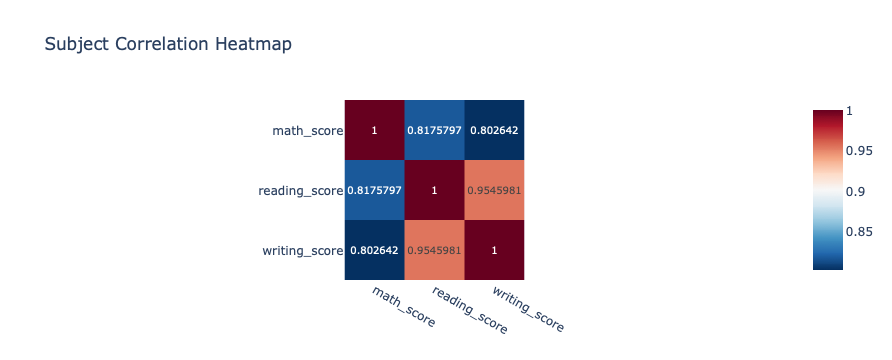

In [46]:
corr = df[['math_score','reading_score','writing_score']].corr()

px.imshow(corr, 
          text_auto = True, 
          color_continuous_scale = 'RdBu_r', 
          title = 'Subject Correlation Heatmap'
         )

Below we analyze how parental education level influences student outcomes.

Observations:
- Students whose parents achieved higher education levels tend to score better in all three subjects.  
- The trend suggests a possible link between home academic environment and student success.  
- However, the differences aren’t extreme which implying that motivation and preparation can still help close the gap.

In [31]:

avg_scores = df.groupby('parental_level_of_education')[['math_score','reading_score','writing_score']].mean().round(1)

avg_scores = avg_scores.sort_values('math_score', ascending = False)

avg_scores


,math_score,reading_score,writing_score
parental_level_of_education,,,
master's degree,69.7,75.4,75.7
bachelor's degree,69.4,73.0,73.4
associate's degree,67.9,70.9,69.9
some college,67.1,69.5,68.8
some high school,63.5,66.9,64.9
high school,62.1,64.7,62.4


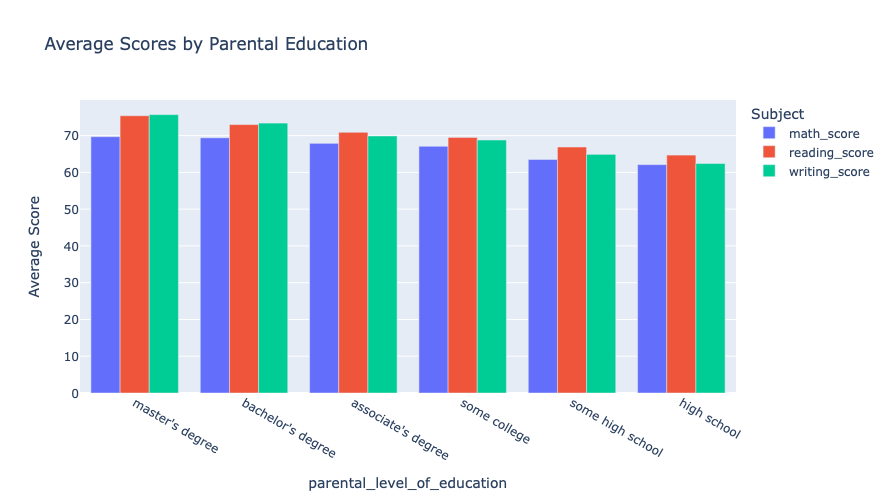

In [50]:
px.bar(
    avg_scores,
    x = avg_scores.index,
    y = ['math_score','reading_score','writing_score'],
    barmode = 'group',
    title = 'Average Scores by Parental Education',
    labels = {'value':'Average Score', 'variable':'Subject'},
    height = 500
)

Below we visualize performance across different race/ethnicity groups.

Observations:
- Average scores vary slightly across groups, but the distributions overlap significantly.  
- This suggests that group membership alone doesn’t determine success, and other factors (such as preparation, parental education, and school support) are more predictive which reinforces the importance of equitable educational access.


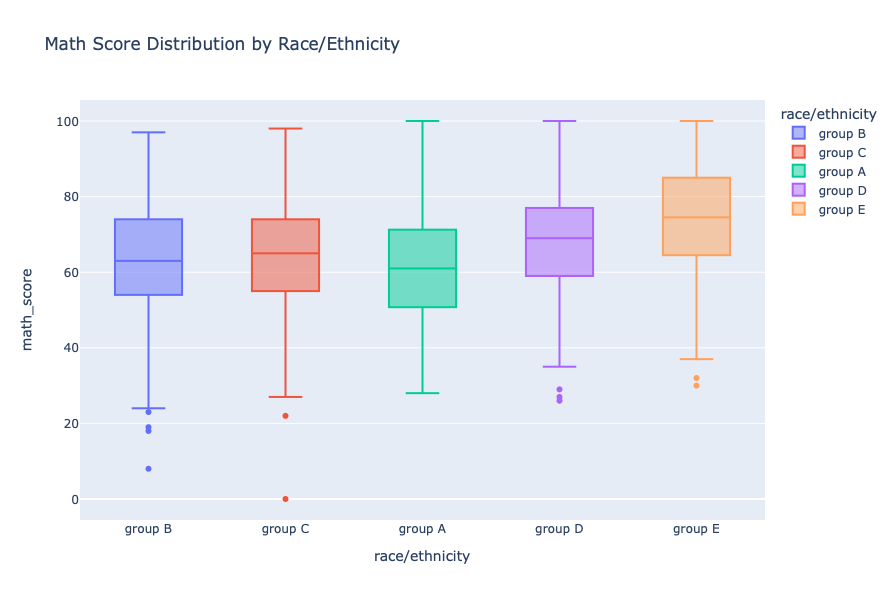

In [47]:
px.box(
    df,
    x = 'race/ethnicity',
    y = 'math_score',
    color = 'race/ethnicity',
    title = 'Math Score Distribution by Race/Ethnicity',
    height = 600
)

In [ ]:
Below average reading, writing, and math scores are averages and pre.

Observations:
- Students who completed test prep courses outperform their peers regardless of gender.  
- Female students maintain stronger reading/writing performance across all test prep categories.  
- This indicates that both test preparation and individual effort play meaningful roles in achievement.


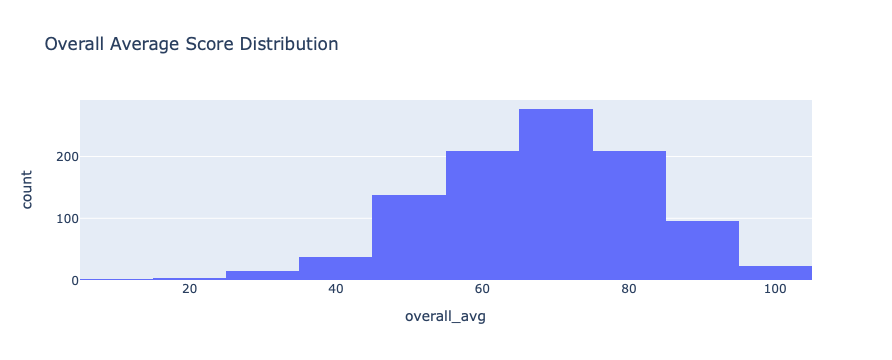

In [29]:
df['overall_avg'] = df[['math_score','reading_score','writing_score']].mean(axis = 1)

px.histogram(df, 
             x = 'overall_avg', 
             nbins = 15, 
             title = 'Overall Average Score Distribution')